<a href="https://colab.research.google.com/github/tchappui/heia-cours-technique-de-reaction/blob/master/Chapitre3/CTR1_Exercice3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 3.7

## Importer les outils

In [0]:
# vecteurs et algèbre linéaire
import numpy as np

# les outils pour visualiser
import matplotlib.pyplot as plt

# le solveur
import scipy.integrate as solveur

## Définir les constantes du problème

In [0]:
k = 0.23 # 1/min
Vdot = 10 # mol/min
CA0 = 3 # mol/L
CB0 = 0 # mol/L

FA0 = Vdot * CA0 # mol/min
FB0 = Vdot * CB0 # mol/min

## Définir les équations à résoudre

In [0]:
def equations(variables, V, Vdot, k):
    FA, FB = variables
    
    CA = FA / Vdot
    
    r = k * CA
    
    RA = -r
    RB = r
    
    dFA = RA
    dFB = RB
    
    return dFA, dFB
    

## Définir les conditions initiales et bornes d'intégration

In [0]:
conditions_initiales = [FA0, FB0]

V = np.arange(0, 150, 0.001)

## Résoudre le problème à l'aide du solveur

In [0]:
resultats = solveur.odeint(
    equations,
    conditions_initiales,
    V,
    (Vdot, k)
)

In [0]:
CA = resultats[:,0] / Vdot
CB = resultats[:,1] / Vdot

X = 1 - CA / CA0

## Visualiser les résultats

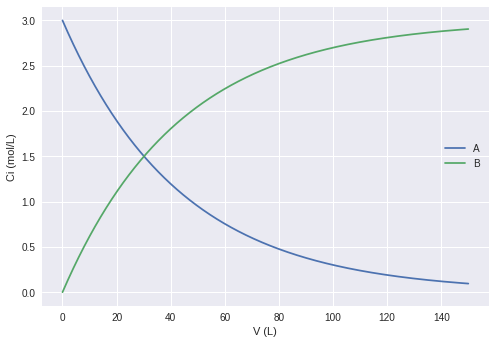

In [7]:
plt.figure(1)
plt.plot(V, CA, V, CB)
plt.xlabel('V (L)')
plt.ylabel('Ci (mol/L)')
plt.legend(['A', 'B'])
plt.show()

In [8]:
V[X > 0.9][0]

100.113